# Machine learning #

Dataset used for CNN: Dogs-vs-Cats (https://www.kaggle.com/datasets/salader/dogs-vs-cats)

Labels:
1. for dog => 1
2. for cat => 0

I will be comparing the performance of two CNN architectures:
1. Self defined CNN
2. VGG16 (predefined CNN)



In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:12<00:00, 117MB/s] 
100% 1.06G/1.06G [00:12<00:00, 93.0MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dogs_vs_cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize so that all pixel values are between 0 and 1 for better results
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## Model 1. Self defined CNN

In [8]:
# create CNN model with 3 convolutional layers
# first layer with 32 filters
# second layer with 64 filters
# third layer with 128 filters

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 106ms/step - loss: 1.5035 - accuracy: 0.5799 - val_loss: 0.6490 - val_accuracy: 0.6480
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5977 - accuracy: 0.6816 - val_loss: 0.5334 - val_accuracy: 0.7374
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4942 - accuracy: 0.7617 - val_loss: 0.4649 - val_accuracy: 0.7806
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4220 - accuracy: 0.8077 - val_loss: 0.5136 - val_accuracy: 0.7866
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3682 - accuracy: 0.8385 - val_loss: 0.4647 - val_accuracy: 0.7844
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2975 - accuracy: 0.8702 - val_loss: 0.5127 - val_accuracy: 0.7942
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2344 - accuracy: 0.9017 - val_loss: 0.5044 - val_ac

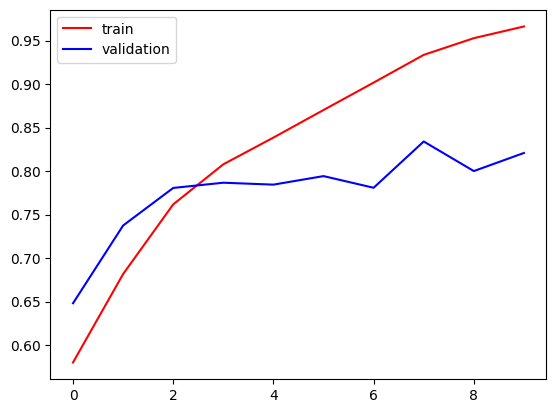

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

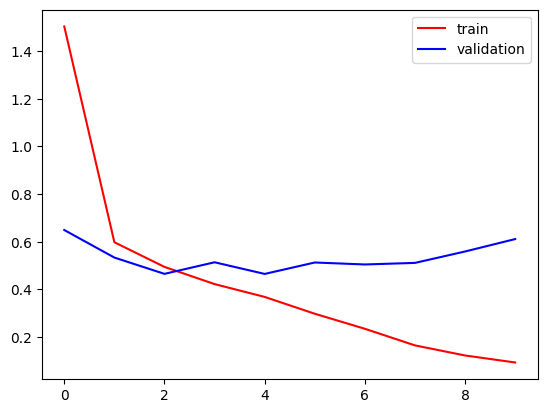

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Ways to reduce overfitting:

1. Add more data
2. Data Augmentation
3. L1/L2 Regularizer
4. Dropout
5. Batch Norm
6. Reduce complexity

### Testing on a dog image downloaded from internet

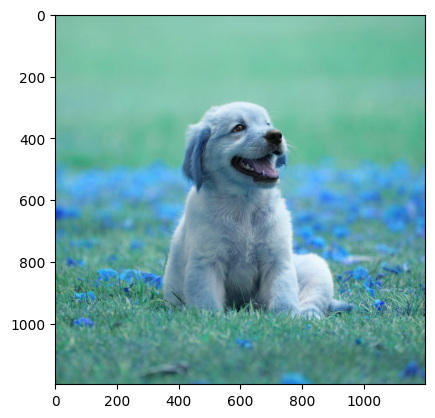

In [17]:
import cv2
test_img = cv2.imread('/content/dog.jpg')
plt.imshow(test_img)

In [18]:
test_img.shape

(1197, 1200, 3)

In [19]:
test_img = cv2.resize(test_img,(256,256))

In [44]:
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)   # Expected output: 1

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)

### Testing on a cat image downloaded from internet

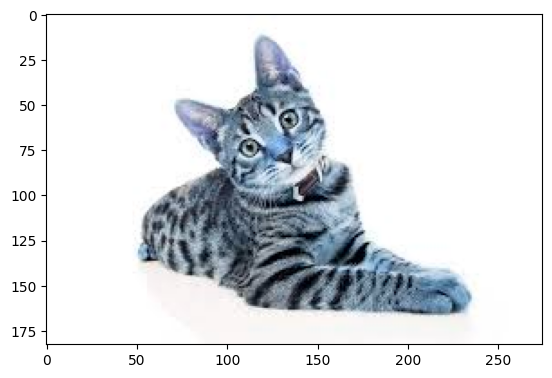

In [45]:
import cv2
test_img1 = cv2.imread('/content/cat.jpeg')
plt.imshow(test_img1)

In [46]:
test_img1.shape

(183, 275, 3)

In [47]:
test_img1 = cv2.resize(test_img1,(256,256))

In [48]:
test_input = test_img1.reshape((1,256,256,3))
model.predict(test_input)  # Expected output: 0

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)

## Using predefined CNN model
## VGG16 
**General plan**:  
1.Explore dataset, make some preprocessing if needed.   
2.Choose two different neural network types, implement and train it on validation and train data.  
3.Make predictions on test data.  
4.Outline conclusions.



## Importing libraries and tools #

In [68]:
!kaggle datasets download -d tongpython/cat-and-dog

 95% 206M/218M [00:01<00:00, 171MB/s]
100% 218M/218M [00:01<00:00, 155MB/s]


In [69]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [70]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [77]:
train_path = 'train/'
test_path = 'test/'

In [78]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=10, shuffle=False)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [79]:
imgs, labels = next(train_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

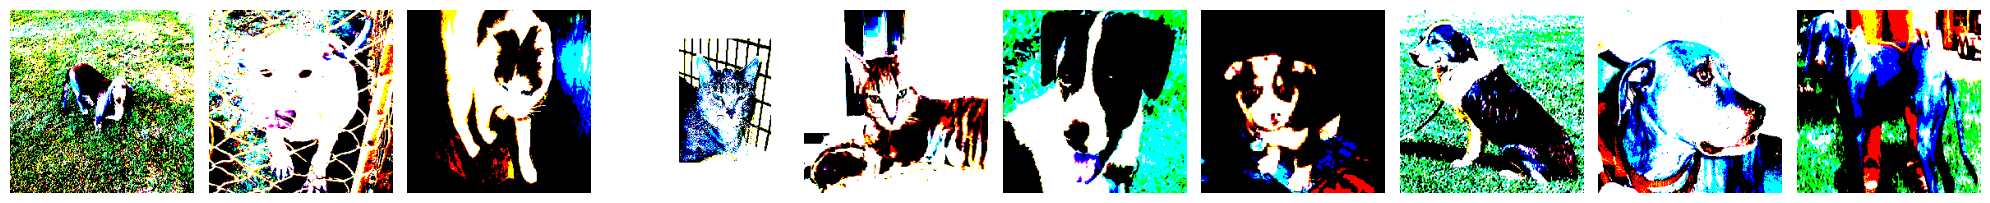

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [80]:
plotImages(imgs)
print(labels)

In [81]:
vgg16_model = tf.keras.applications.vgg16.VGG16()
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [82]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [83]:
for layer in model.layers:
    layer.trainable = False  # We don't want to retrain as VGG-16 is already trained on classes like cats, dogs.

In [84]:
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [109]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x = train_batches,
          steps_per_epoch = len(train_batches),
          epochs = 5,
          verbose = 2
         )

Epoch 1/5
2000/2000 - 127s - loss: 0.0055 - accuracy: 0.9991 - 127s/epoch - 64ms/step
Epoch 2/5
2000/2000 - 110s - loss: 0.0047 - accuracy: 0.9991 - 110s/epoch - 55ms/step
Epoch 3/5
2000/2000 - 112s - loss: 0.0039 - accuracy: 0.9996 - 112s/epoch - 56ms/step
Epoch 4/5
2000/2000 - 110s - loss: 0.0032 - accuracy: 0.9998 - 110s/epoch - 55ms/step
Epoch 5/5
2000/2000 - 113s - loss: 0.0030 - accuracy: 0.9998 - 113s/epoch - 57ms/step


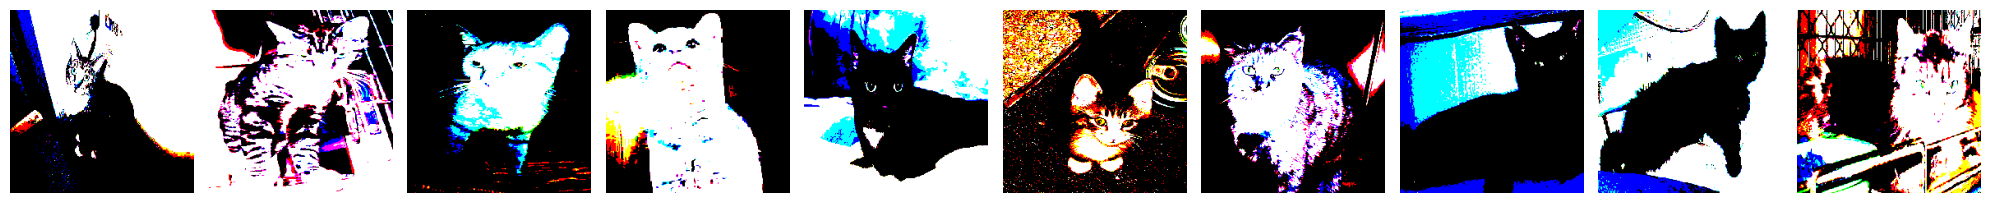

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [110]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [111]:
predictions = model.predict(x = test_batches, steps = len(test_batches), verbose = 0)

In [112]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

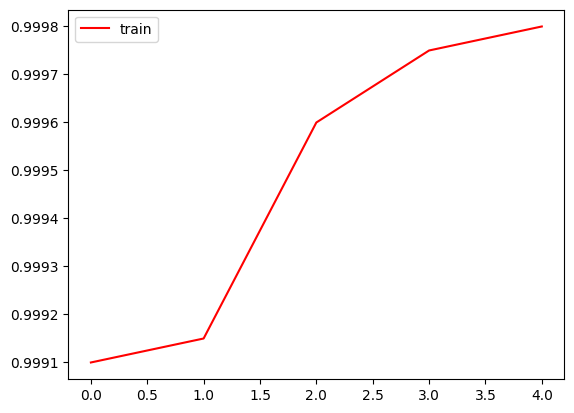

In [113]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.legend()
plt.show()

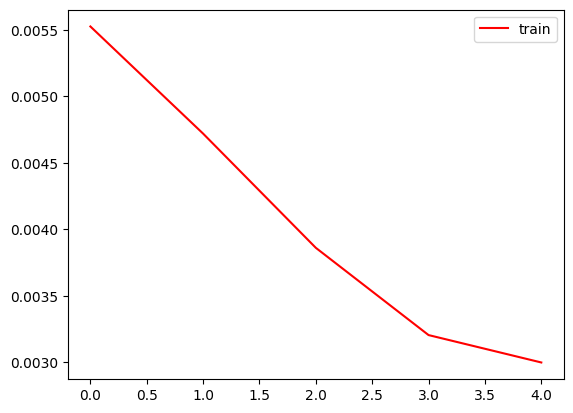

In [115]:
plt.plot(history.history['loss'],color='red',label='train')
plt.legend()
plt.show()